In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving flightss.csv to flightss.csv


In [4]:
df = pd.read_csv("flightss.csv")

In [5]:
# ANS 1
df.shape
# 10683 rows
# 11 columns

(10683, 12)

<Axes: xlabel='Price', ylabel='Count'>

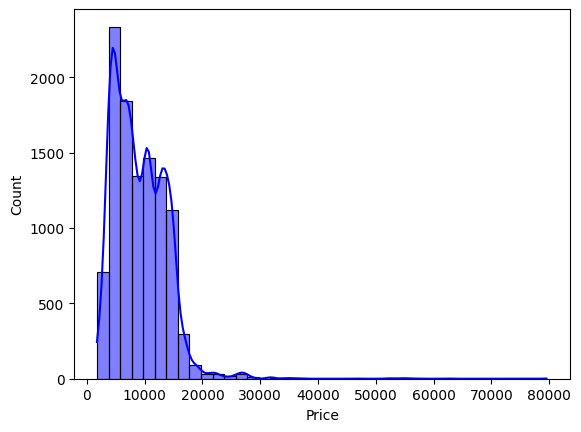

In [6]:
# ANS 2:
sns.histplot(data=df['Price'],binwidth=2000,kde=True,color='b')
# distribution is left skewed

In [7]:
# ANS 3:
df.describe()
# min  = 1759.000000
# max = 79512.000000

,Unnamed: 0,Price
count,10683.000000,10683.000000
mean,5341.000000,9087.064121
std,3084.060797,4611.359167
min,0.000000,1759.000000
25%,2670.500000,5277.000000
50%,5341.000000,8372.000000
75%,8011.500000,12373.000000
max,10682.000000,79512.000000


In [8]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

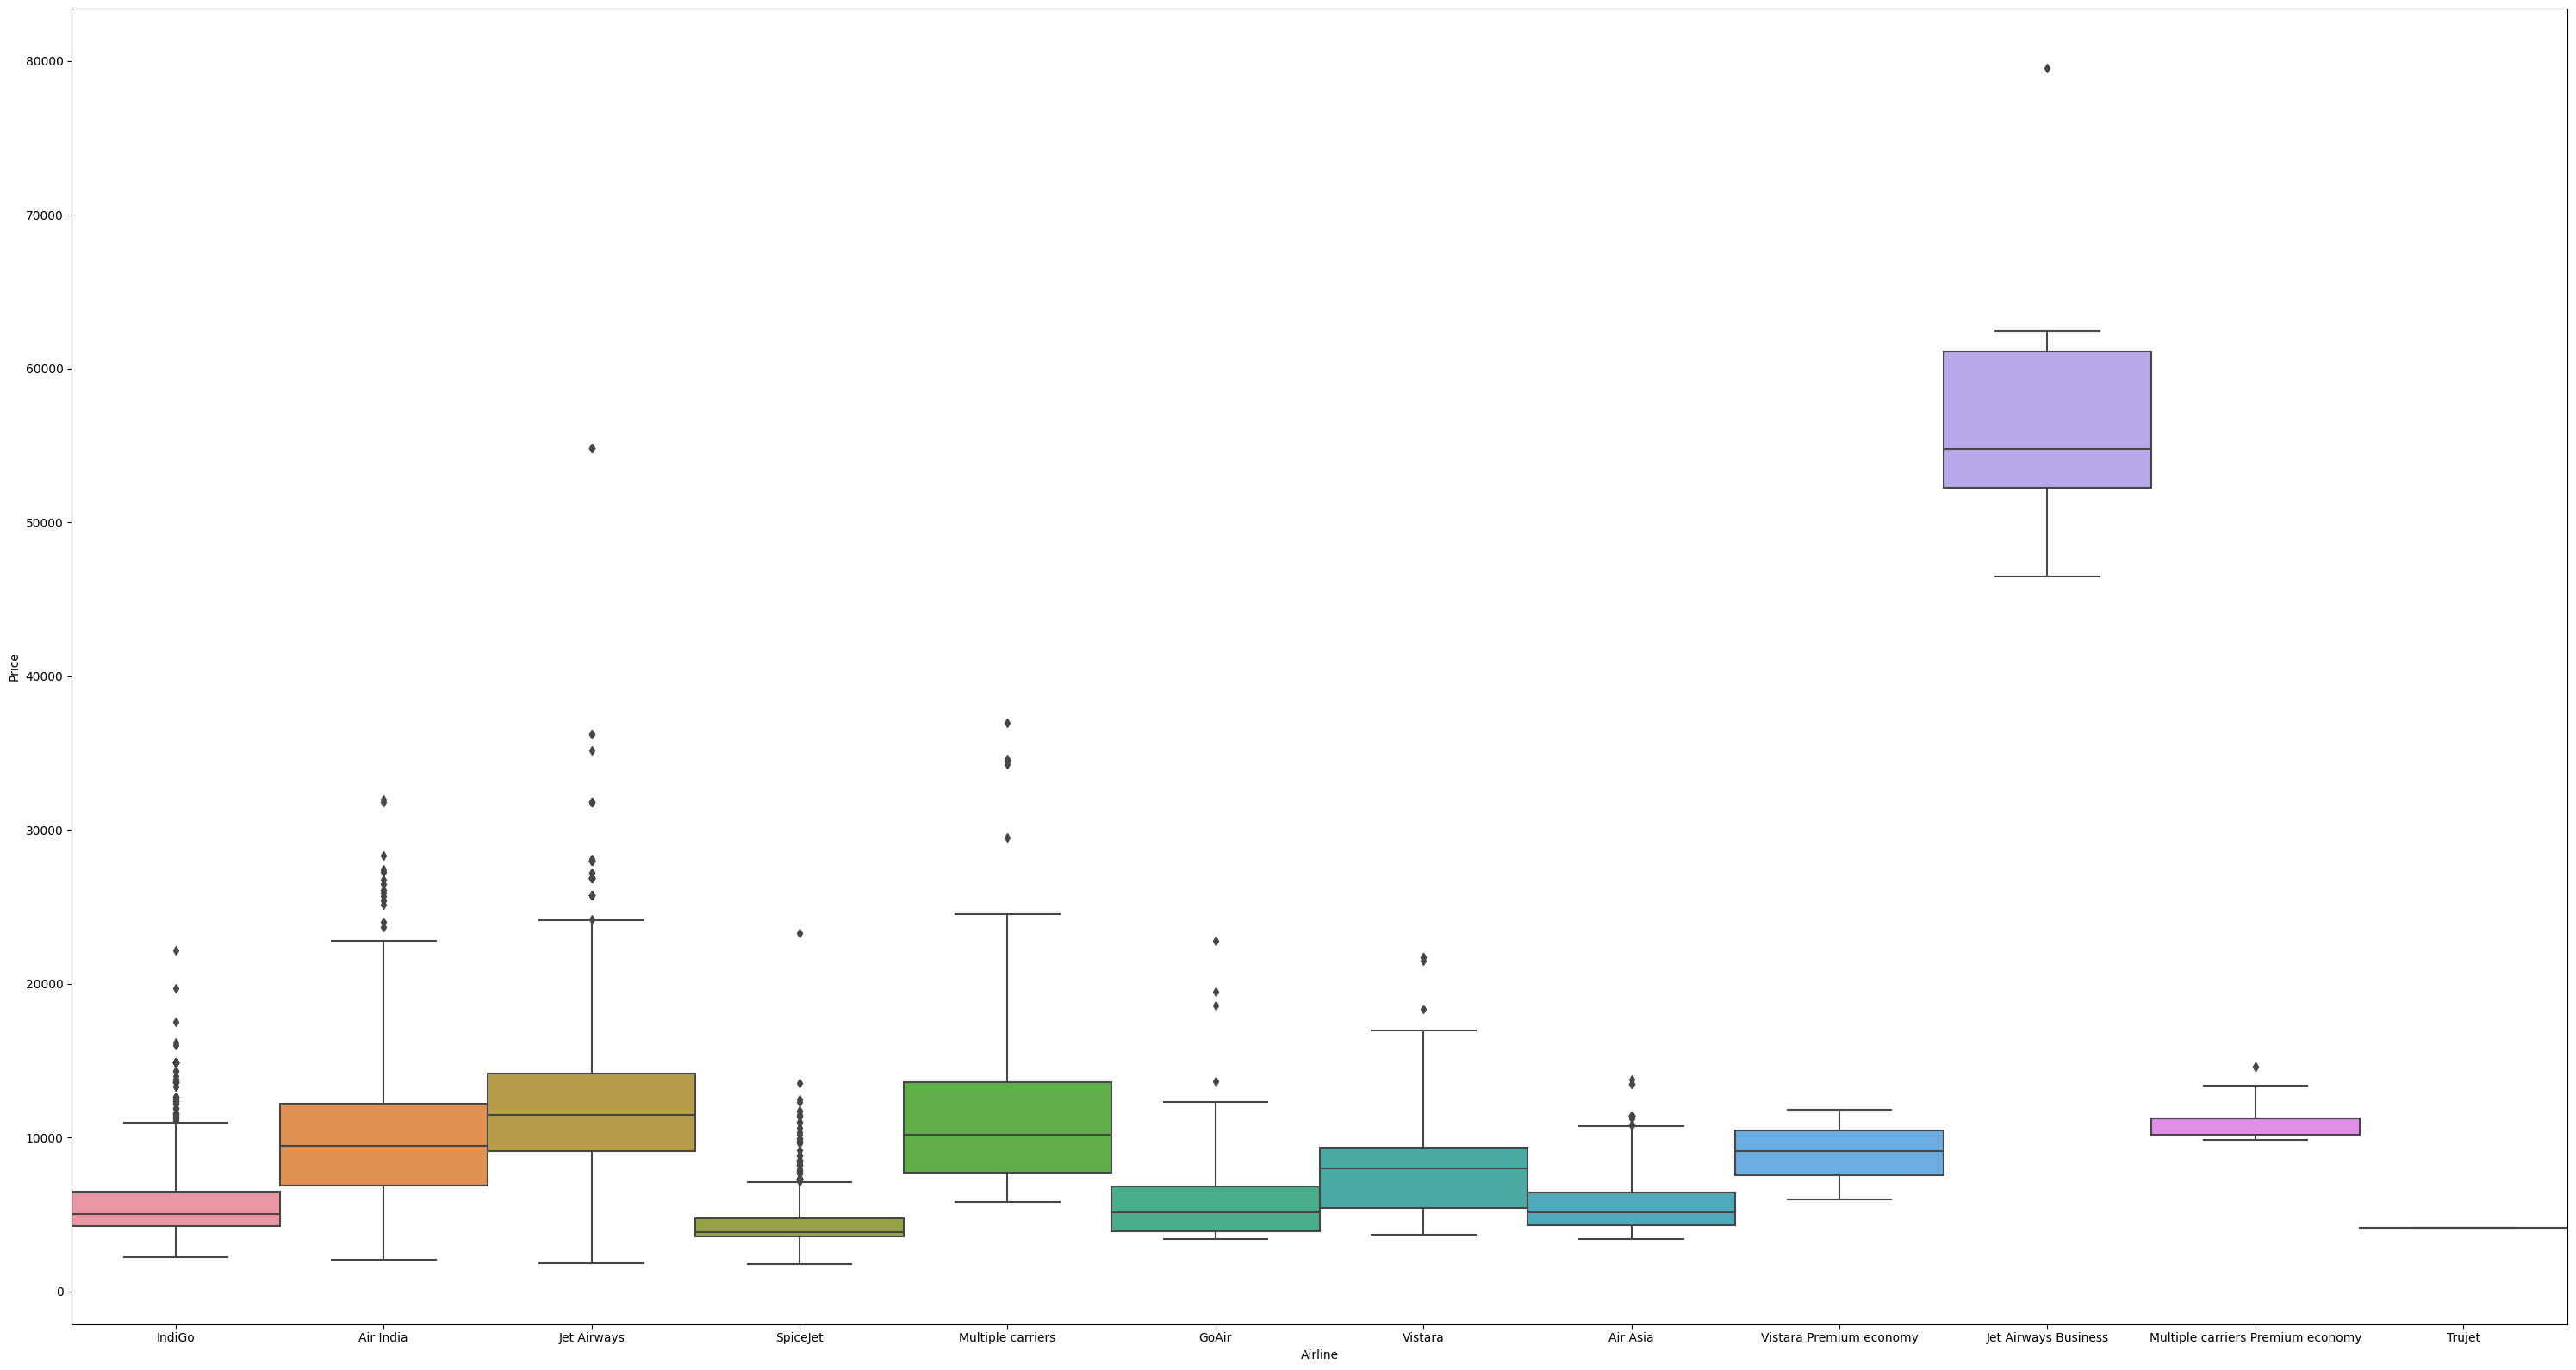

In [9]:
# ANS 4
fig, axis = plt.subplots(figsize=(30,16))
sns.boxplot(data=df,x='Airline',y='Price',width=1.0,whis=2.0)
plt.tight_layout()

<Axes: >

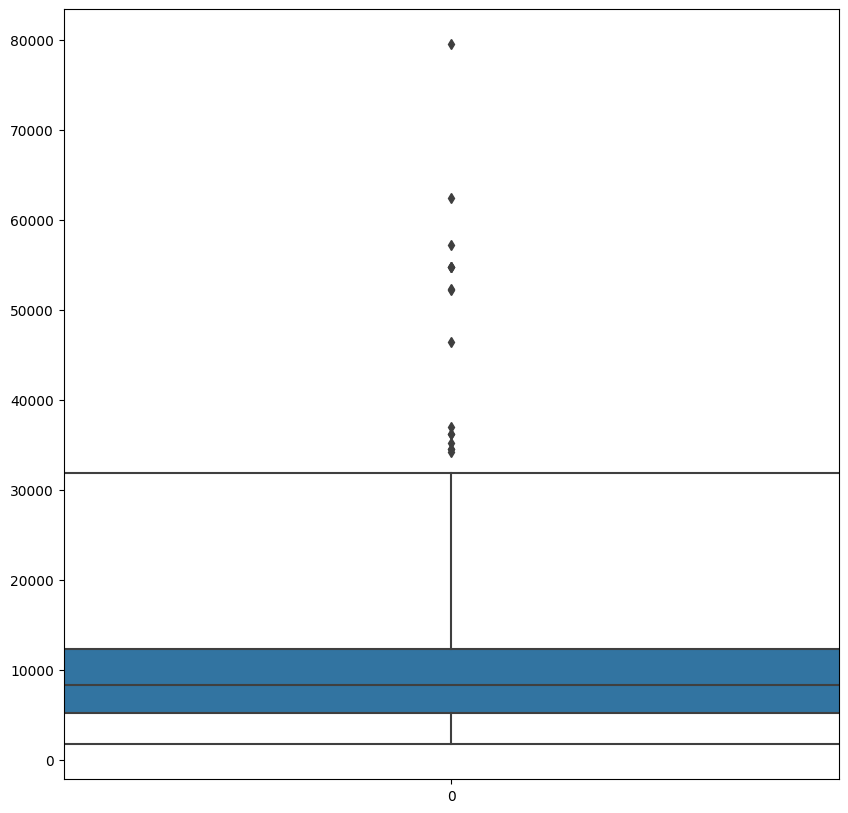

In [10]:
# ANS 5:
# so , price is the only numerical feature which we have 
fig, axis = plt.subplots(figsize=(10,10))
sns.boxplot(data=df['Price'],width=4.0,whis=3.0)
# there are many outliers are there in price feature 
# it can impact when we calculate the mean of the distribution
# which effect in analysis of data

In [11]:
# ANS 6 :
# step 1. i will seperate the month from Date_of_journey feature
df["Arrival_month"] = df["Date_of_Journey"].str.split('/').str[1]

In [12]:
# calculating the values of each month
df["Arrival_month"].value_counts()

05    3466
06    3414
03    2724
04    1079
Name: Arrival_month, dtype: int64

<Axes: xlabel='Arrival_month', ylabel='Count'>

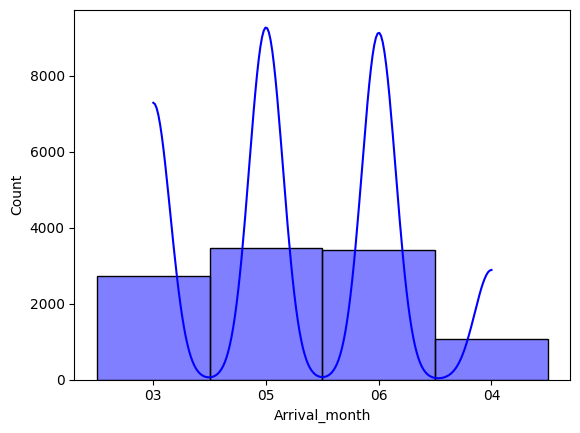

In [13]:
sns.histplot(data=df["Arrival_month"],kde=True,color='b')

In [14]:
# Insight 
# peak season is may and june

In [15]:
# ANS 7 :
df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_month
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03


<Axes: xlabel='Price', ylabel='Count'>

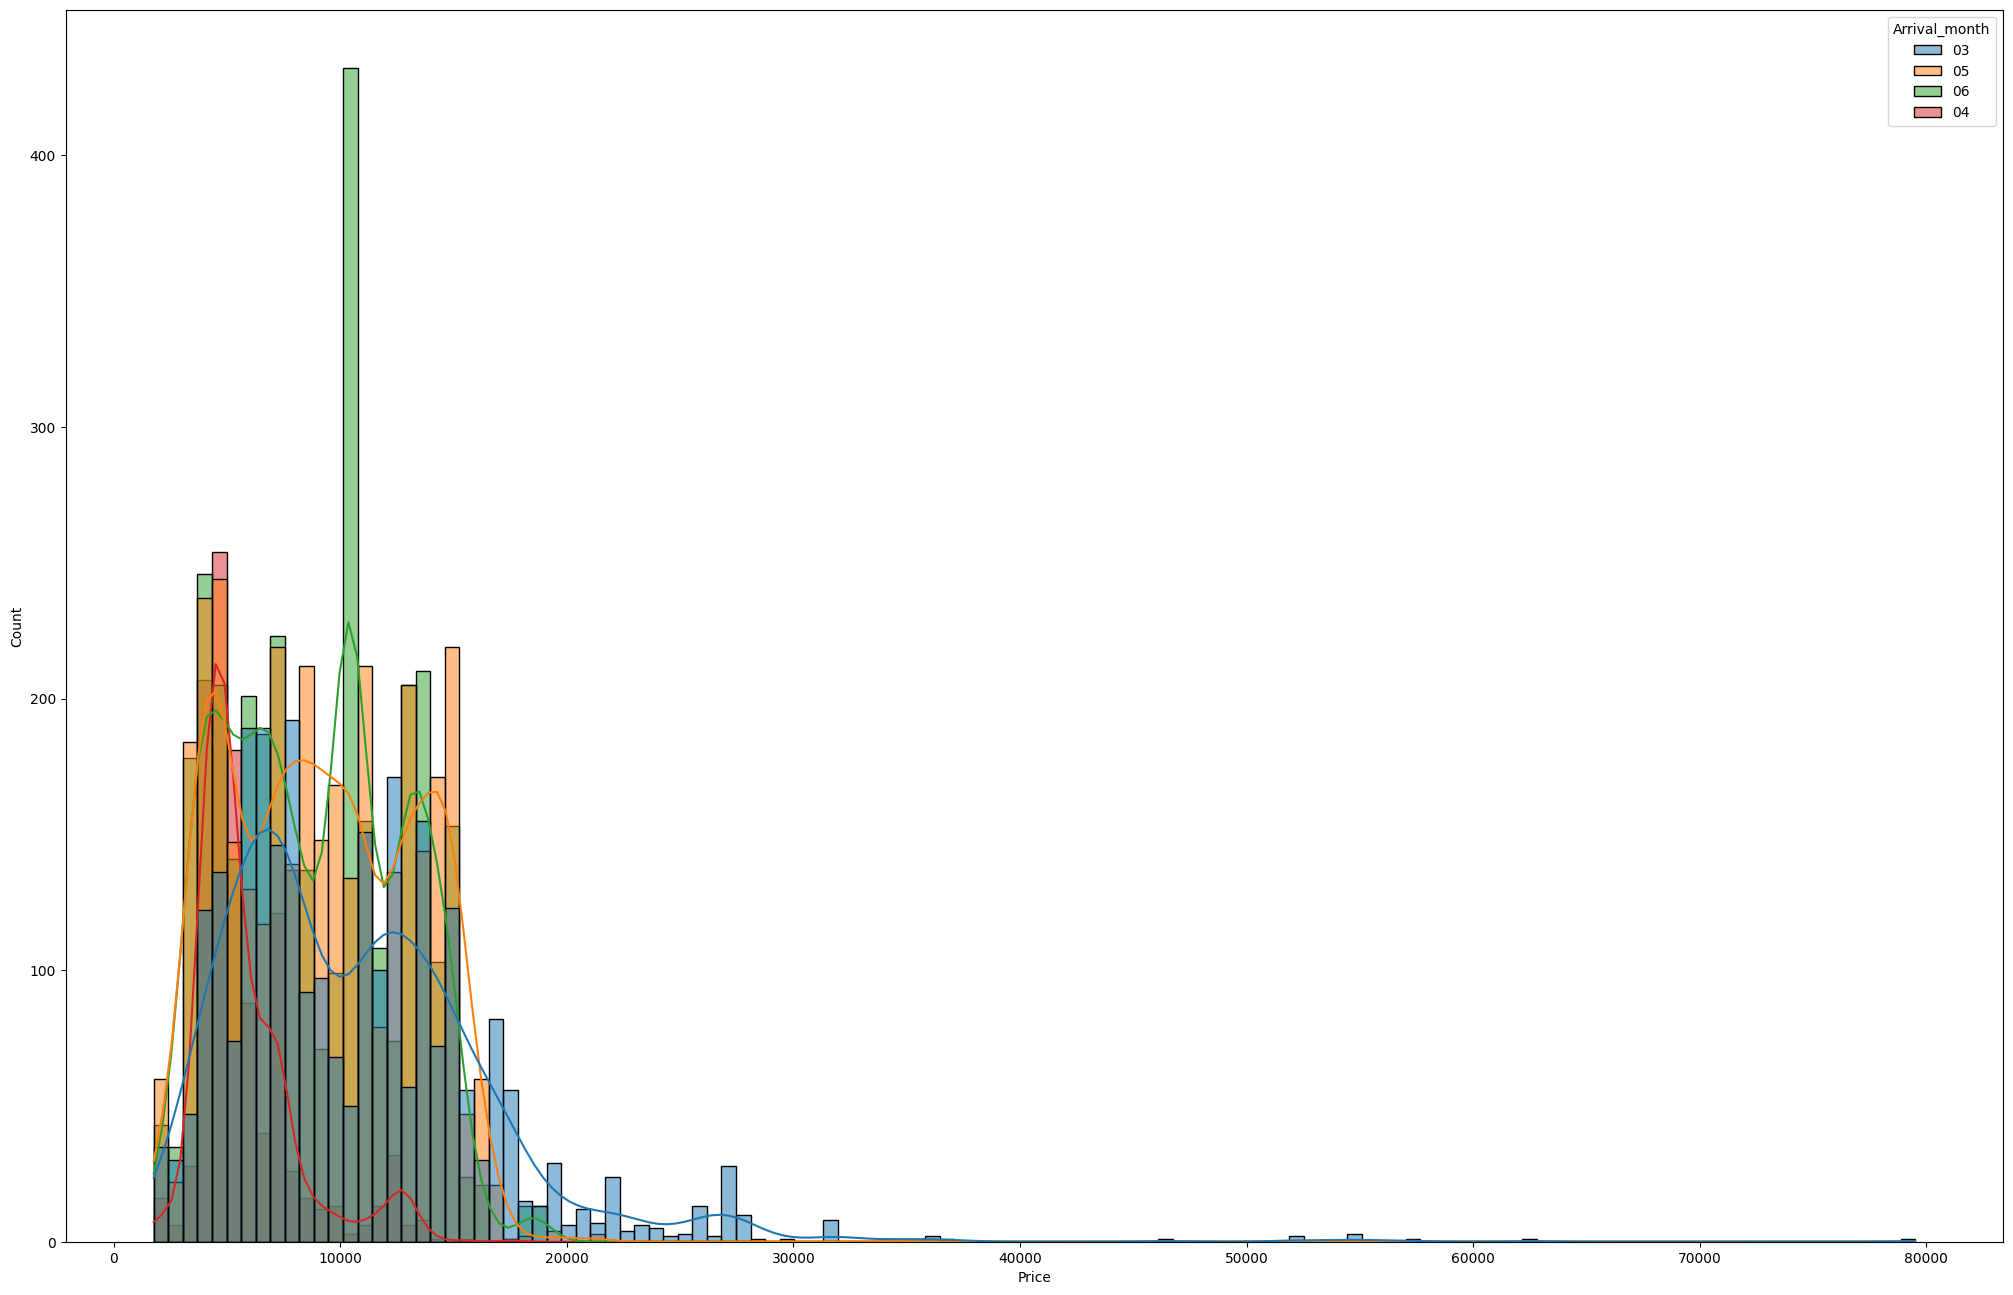

In [16]:
fig,axis=plt.subplots(figsize=(25,16))
sns.histplot(data=df,x='Price',kde=True,hue='Arrival_month')

In [17]:
# Trends of prices
# In the month of april prices are low as compare to May and June
# march prices are ok

In [18]:
# ANS 8 :
df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_month
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03


In [19]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

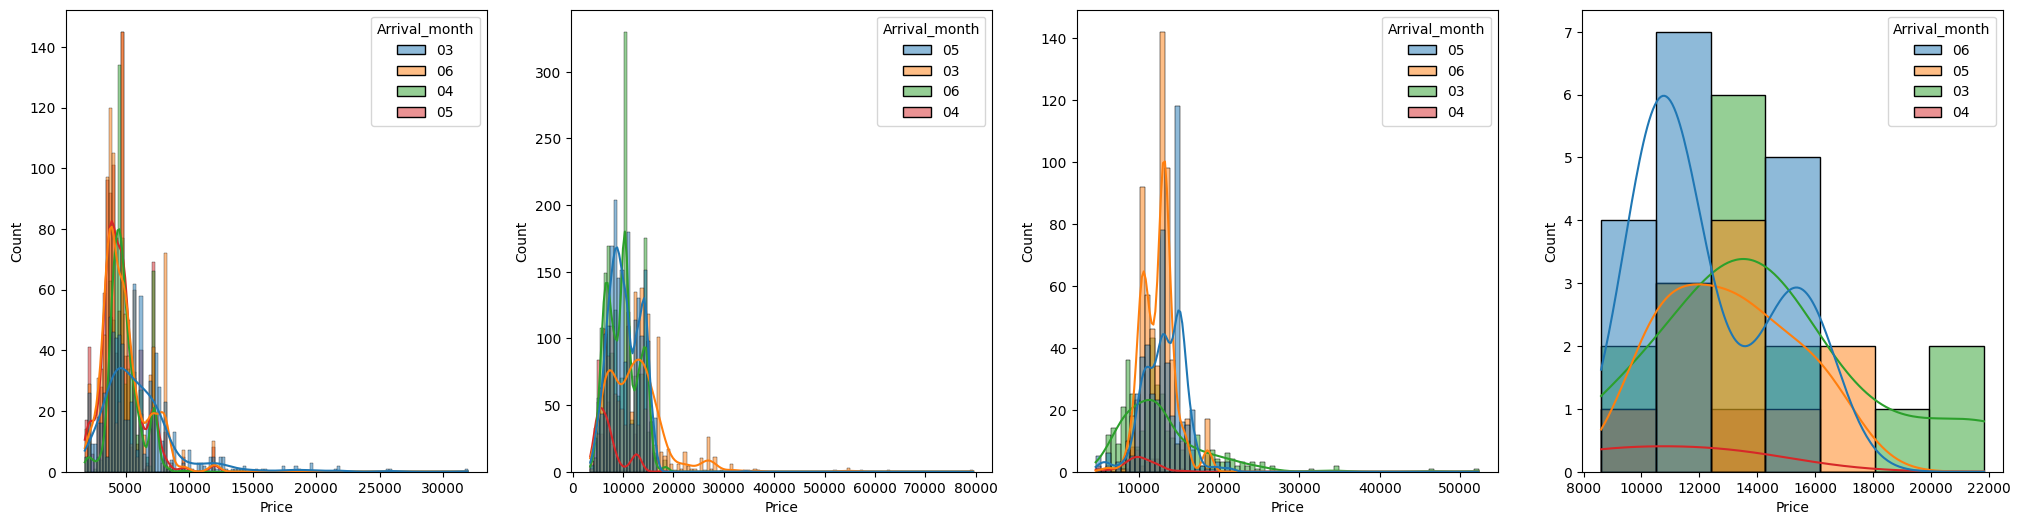

In [20]:
fig,axis=plt.subplots(1,4,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df[df.Total_Stops=='non-stop'],x='Price',kde=True,hue='Arrival_month') 
plt.subplot(142)
sns.histplot(data=df[df.Total_Stops=='1 stop'],x='Price',kde=True,hue='Arrival_month') 
plt.subplot(143)
sns.histplot(data=df[df.Total_Stops=='2 stops'],x='Price',kde=True,hue='Arrival_month') 
plt.subplot(144)
sns.histplot(data=df[df.Total_Stops=='3 stops'],x='Price',kde=True,hue='Arrival_month') 


In [21]:
# Insight 
# flights which are non stop their prices are low as compare to others
# flights which have 1 or 2 stops are some what high as compare to others
# flights which have 3 and 4 stops are least taken by passengers

<Axes: xlabel='Price', ylabel='Count'>

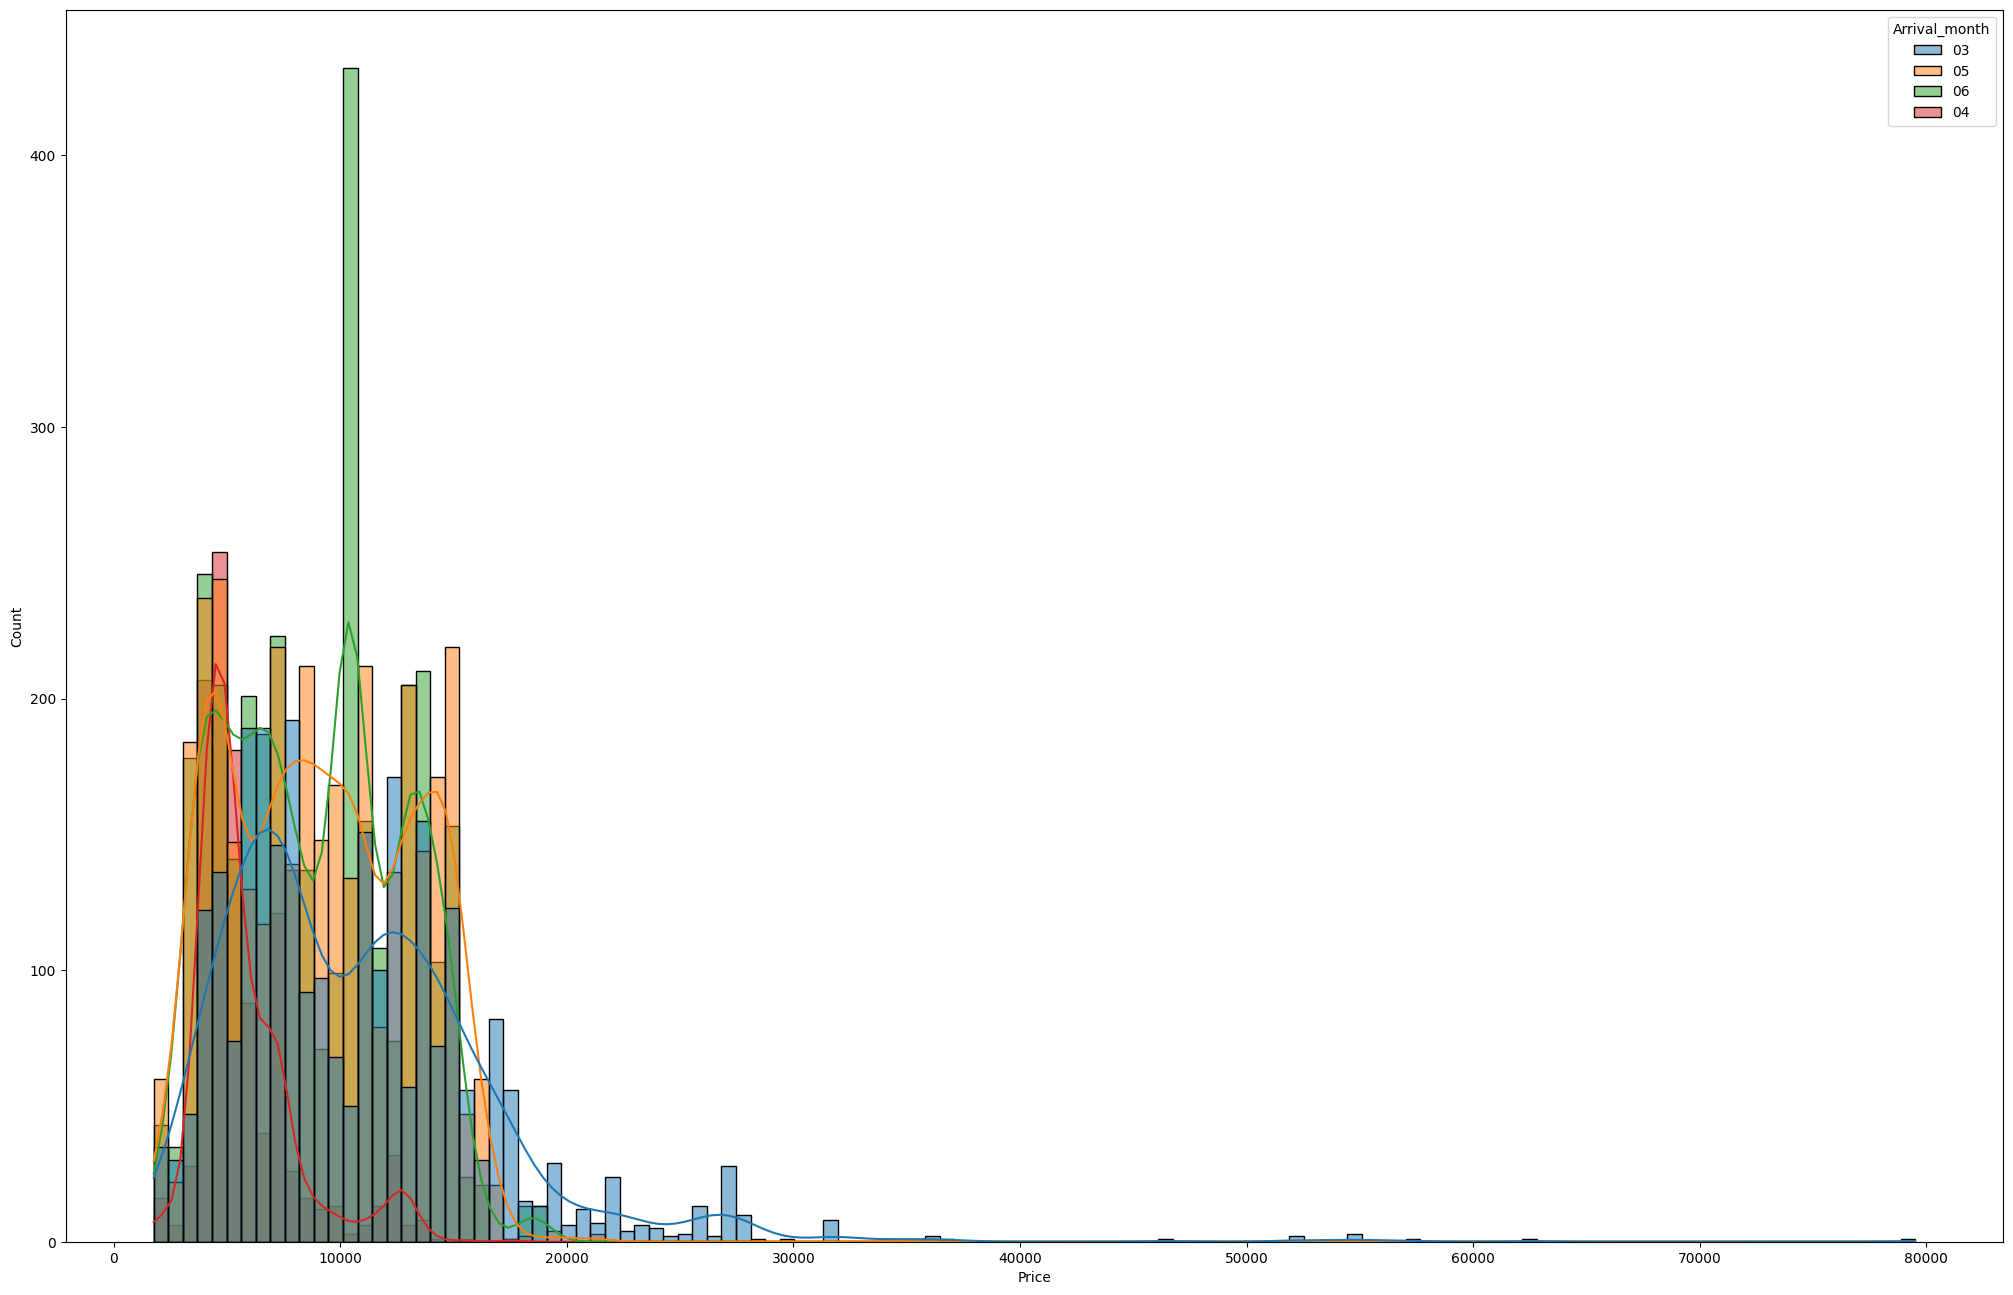

In [22]:
fig,axis=plt.subplots(figsize=(25,16))
sns.histplot(data=df,x='Price',kde=True,hue='Arrival_month')

In [23]:
# Insights 
# months also effect the prices
# In the month of april prices are low as compare to May and June
# march prices are comparetively low

In [24]:
df['Arrival_hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

In [25]:

df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_month,Arrival_hours
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03,01
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,13
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06,04
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05,23
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03,21


In [26]:
df['Arrival_hours']=df['Arrival_hours'].astype(int)

In [27]:
def day_night(x):
    if x>16:
        return "night"
    else:
        return "day"
df["day_night"]=df["Arrival_hours"].apply(day_night)    

<Axes: xlabel='Price', ylabel='Count'>

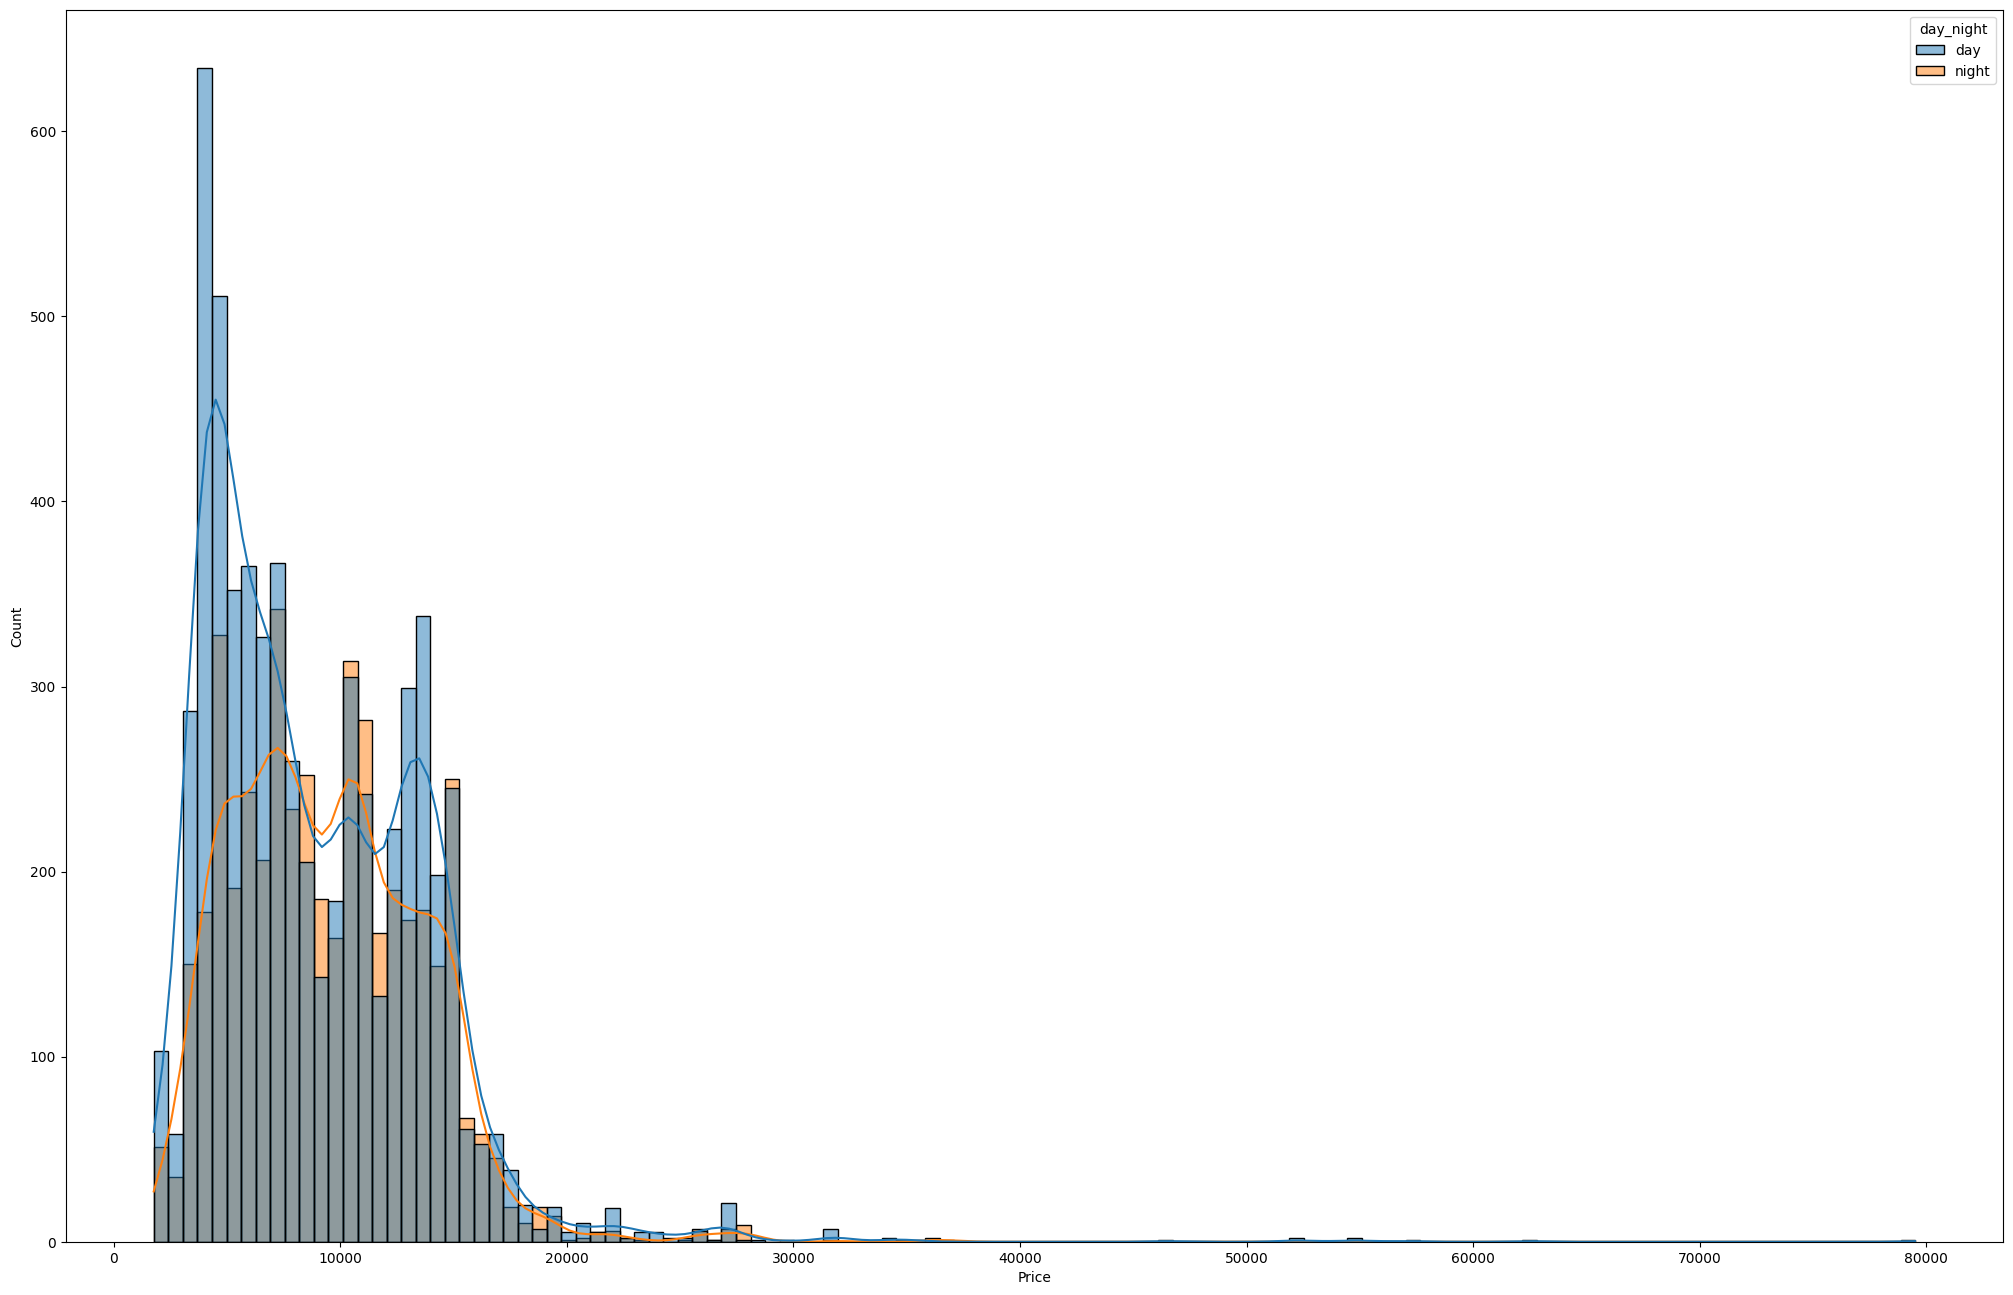

In [28]:
fig,axis=plt.subplots(figsize=(25,16))
sns.histplot(data=df,x='Price',kde=True,hue='day_night')

In [29]:
# Insight 
# Day timing  prices are slightly low than prices in night timings

<Axes: xlabel='Price', ylabel='Count'>

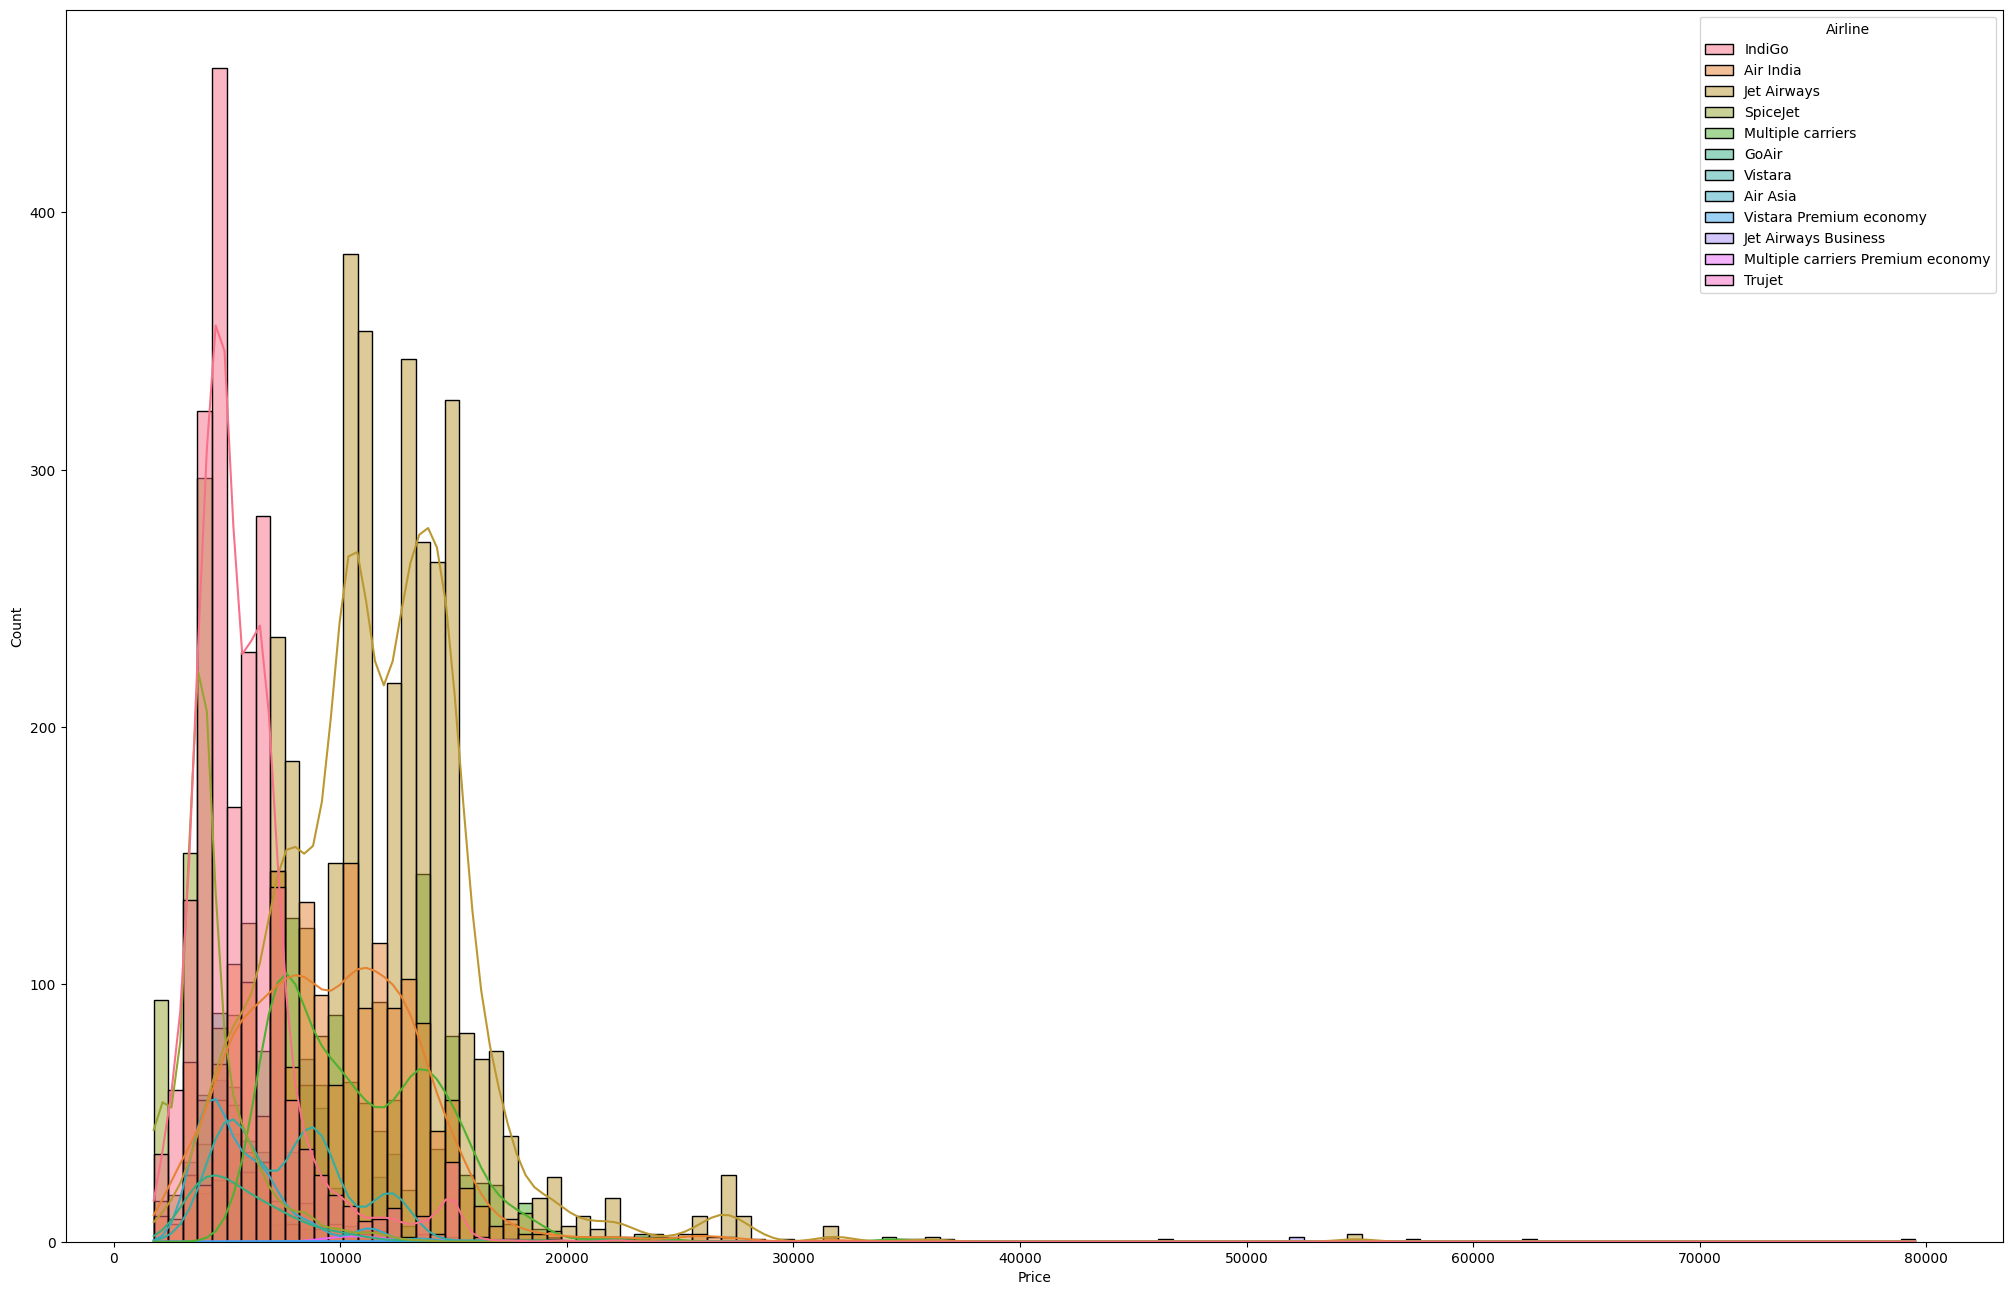

In [30]:
fig,axis=plt.subplots(figsize=(25,16))
sns.histplot(data=df,x='Price',kde=True,hue='Airline')

In [31]:
# Insight 
# jet Airways prices are high as comapre to others ranges between 10000 - 20000
# Indigo , air asia , vistara , GoAir prices are low ranges between 5000-10000

GOOGLE PLAYSTORE DATA

In [32]:
df2 = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [33]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
# ANS 9 :
df2.shape
# dimensions are:
# 10841, 13

(10841, 13)

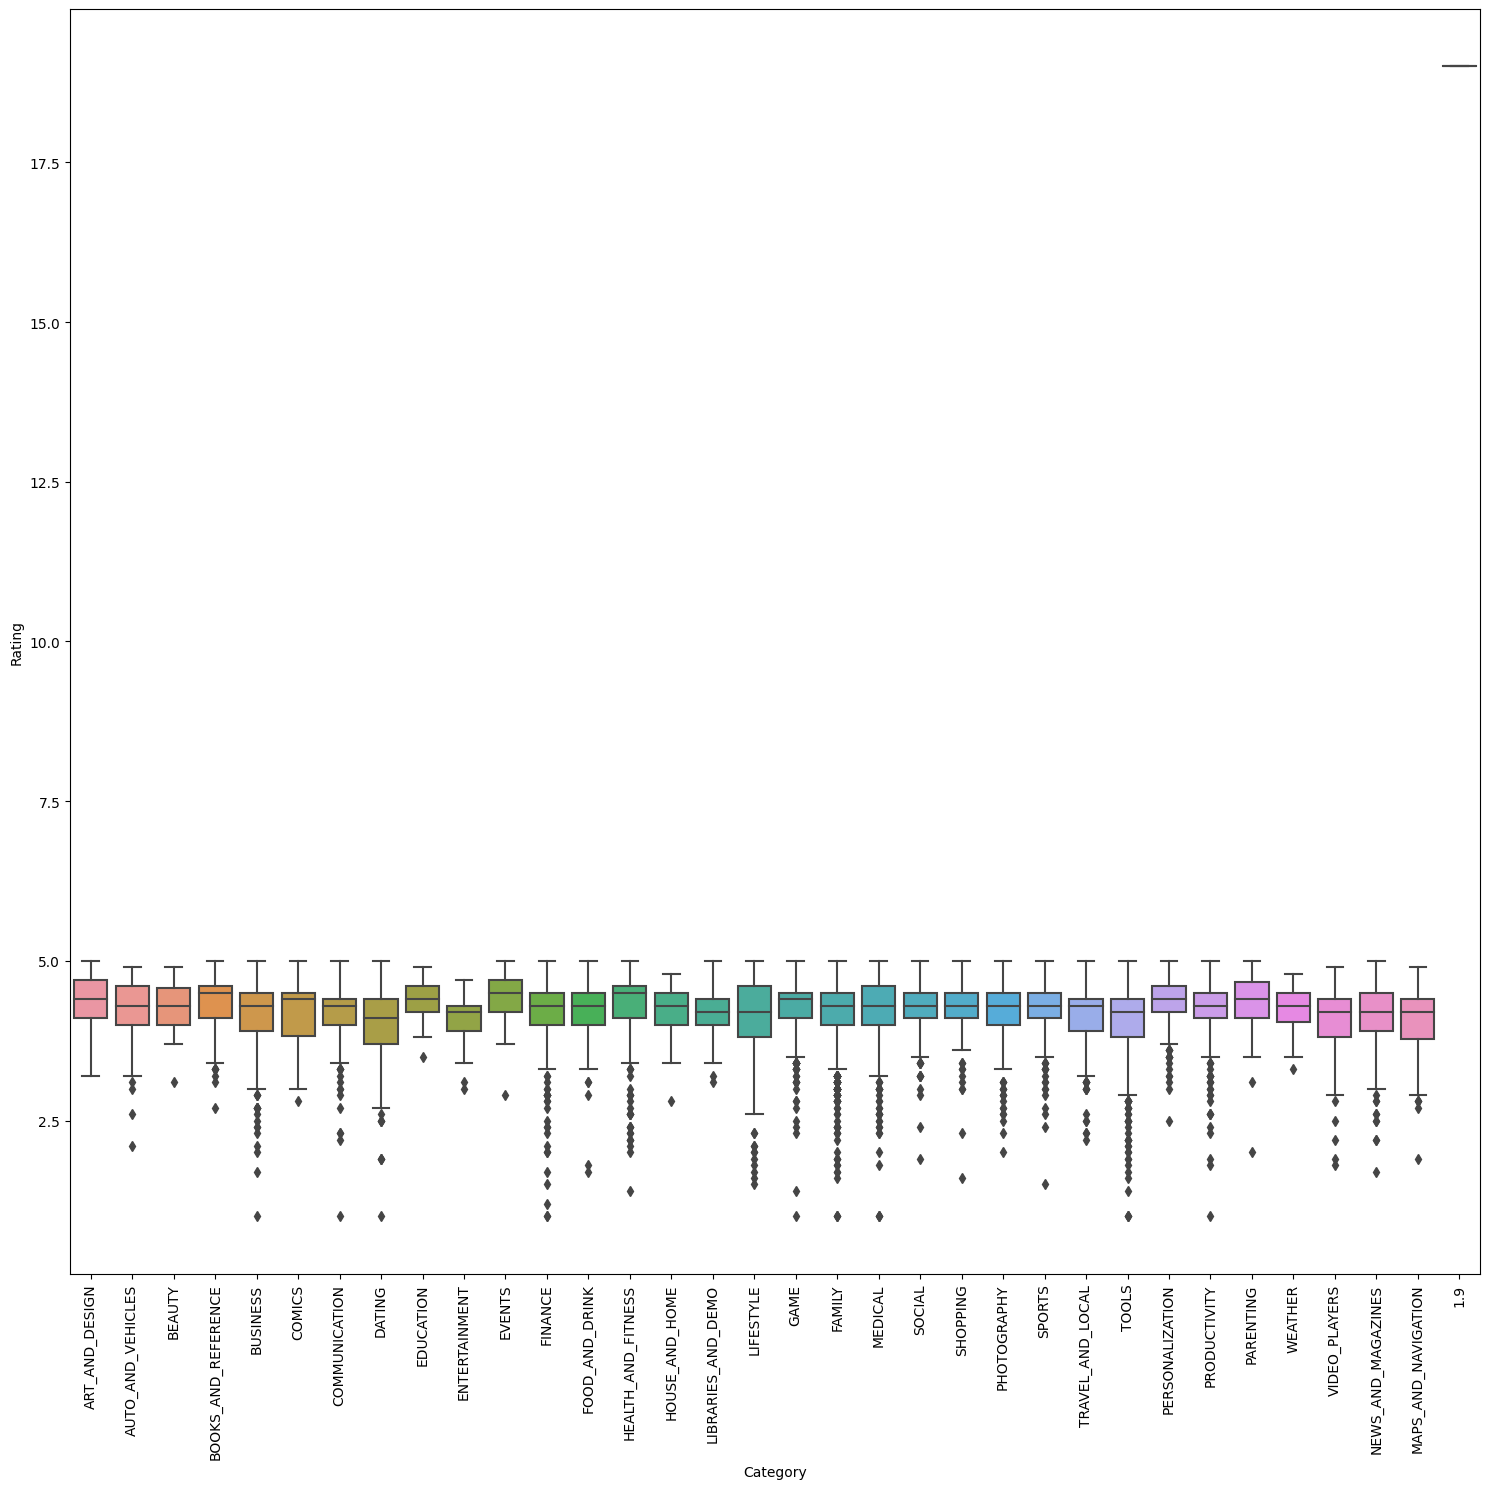

In [35]:
# ANS 10:
fig = plt.subplots(figsize=(15,15))
sns.boxplot(data=df2,x=df2.Category,y=df2.Rating)
plt.xticks(rotation=90)
plt.tight_layout()

In [36]:
# ANS 11
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [37]:
# there are some missing values
# it can impact the ananlysis by :
# 1.Biased results: Missing data can introduce bias into the analysis. 
# 2.Reduced sample size: Missing values reduce the effective sample size, potentially reducing the power of statistical tests
# 3.Missing data can disrupt the distribution of variables. 

In [38]:
# ANS 12"
# first we have to in  convert into numerical feature
df2["Size"]=df2["Size"].str.replace('M','000') # str.replace() method repaces a particular stings in the specific datapoint
df2["Size"]=df2["Size"].str.replace('k','') 
df2["Size"]=df2["Size"].str.replace('+','')
df2["Size"]=df2["Size"].str.replace(',','')
df2["Size"]=df2["Size"].replace('Varies with device',np.nan)
df2["Size"]=df2["Size"].astype(float)    

<ipython-input-38-e676bc4b7f9a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Size"]=df2["Size"].str.replace('+','')


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


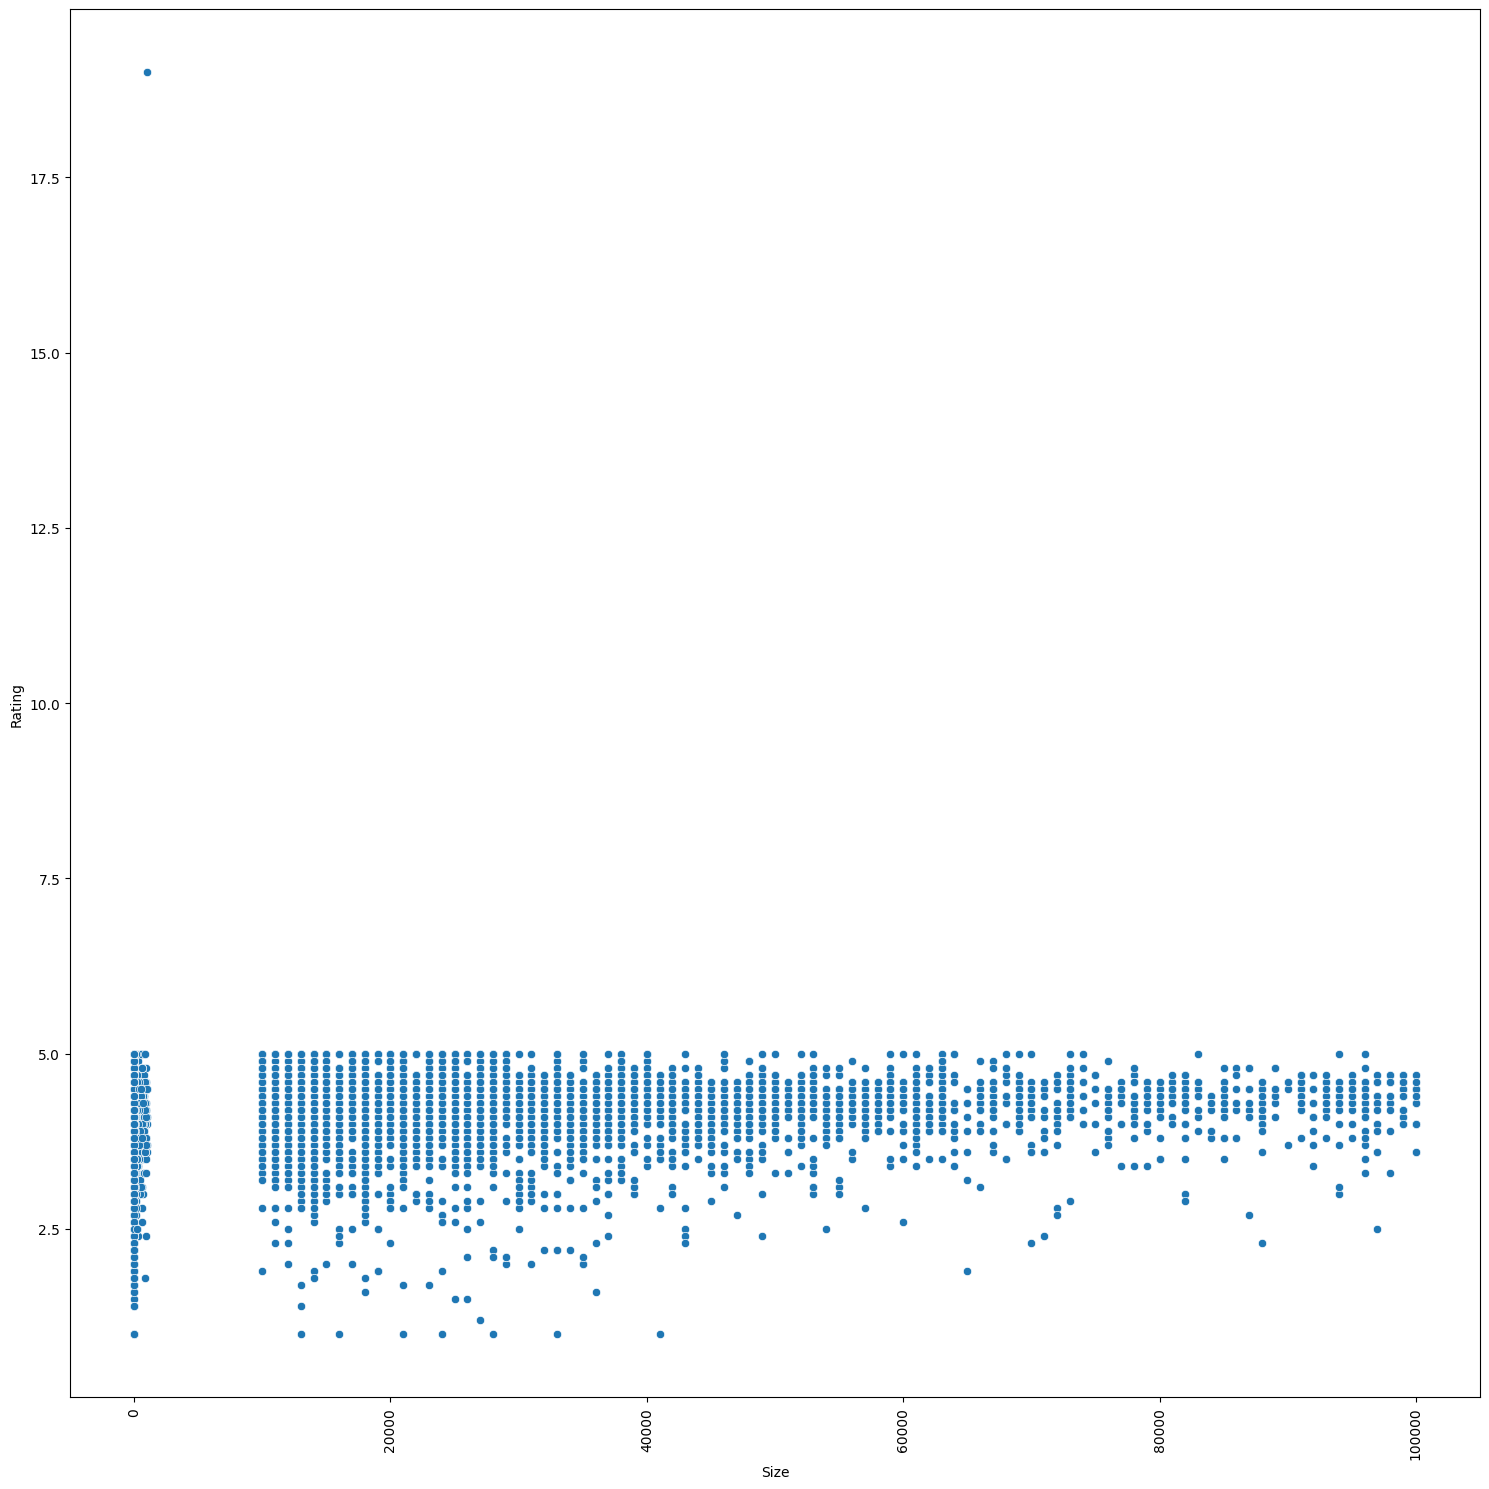

In [40]:
fig = plt.subplots(figsize=(15,15))
sns.scatterplot(data=df2,x=df2.Size,y=df2.Rating)
plt.xticks(rotation=90)
plt.tight_layout()

In [41]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
# ANS 13
df2["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [43]:
df2["Price"]=df2["Price"].str.replace('$','')
df2["Price"]=df2["Price"].replace('Everyone',np.nan)
df2["Price"]=df2["Price"].astype(float)  

<ipython-input-43-9d590afab94d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Price"]=df2["Price"].str.replace('$','')


In [44]:
af = pd.DataFrame(df2.groupby(["Type"])["Price"].mean())

In [45]:
af

,Price
Type,
0,NaN
Free,0.000000
Paid,13.920837


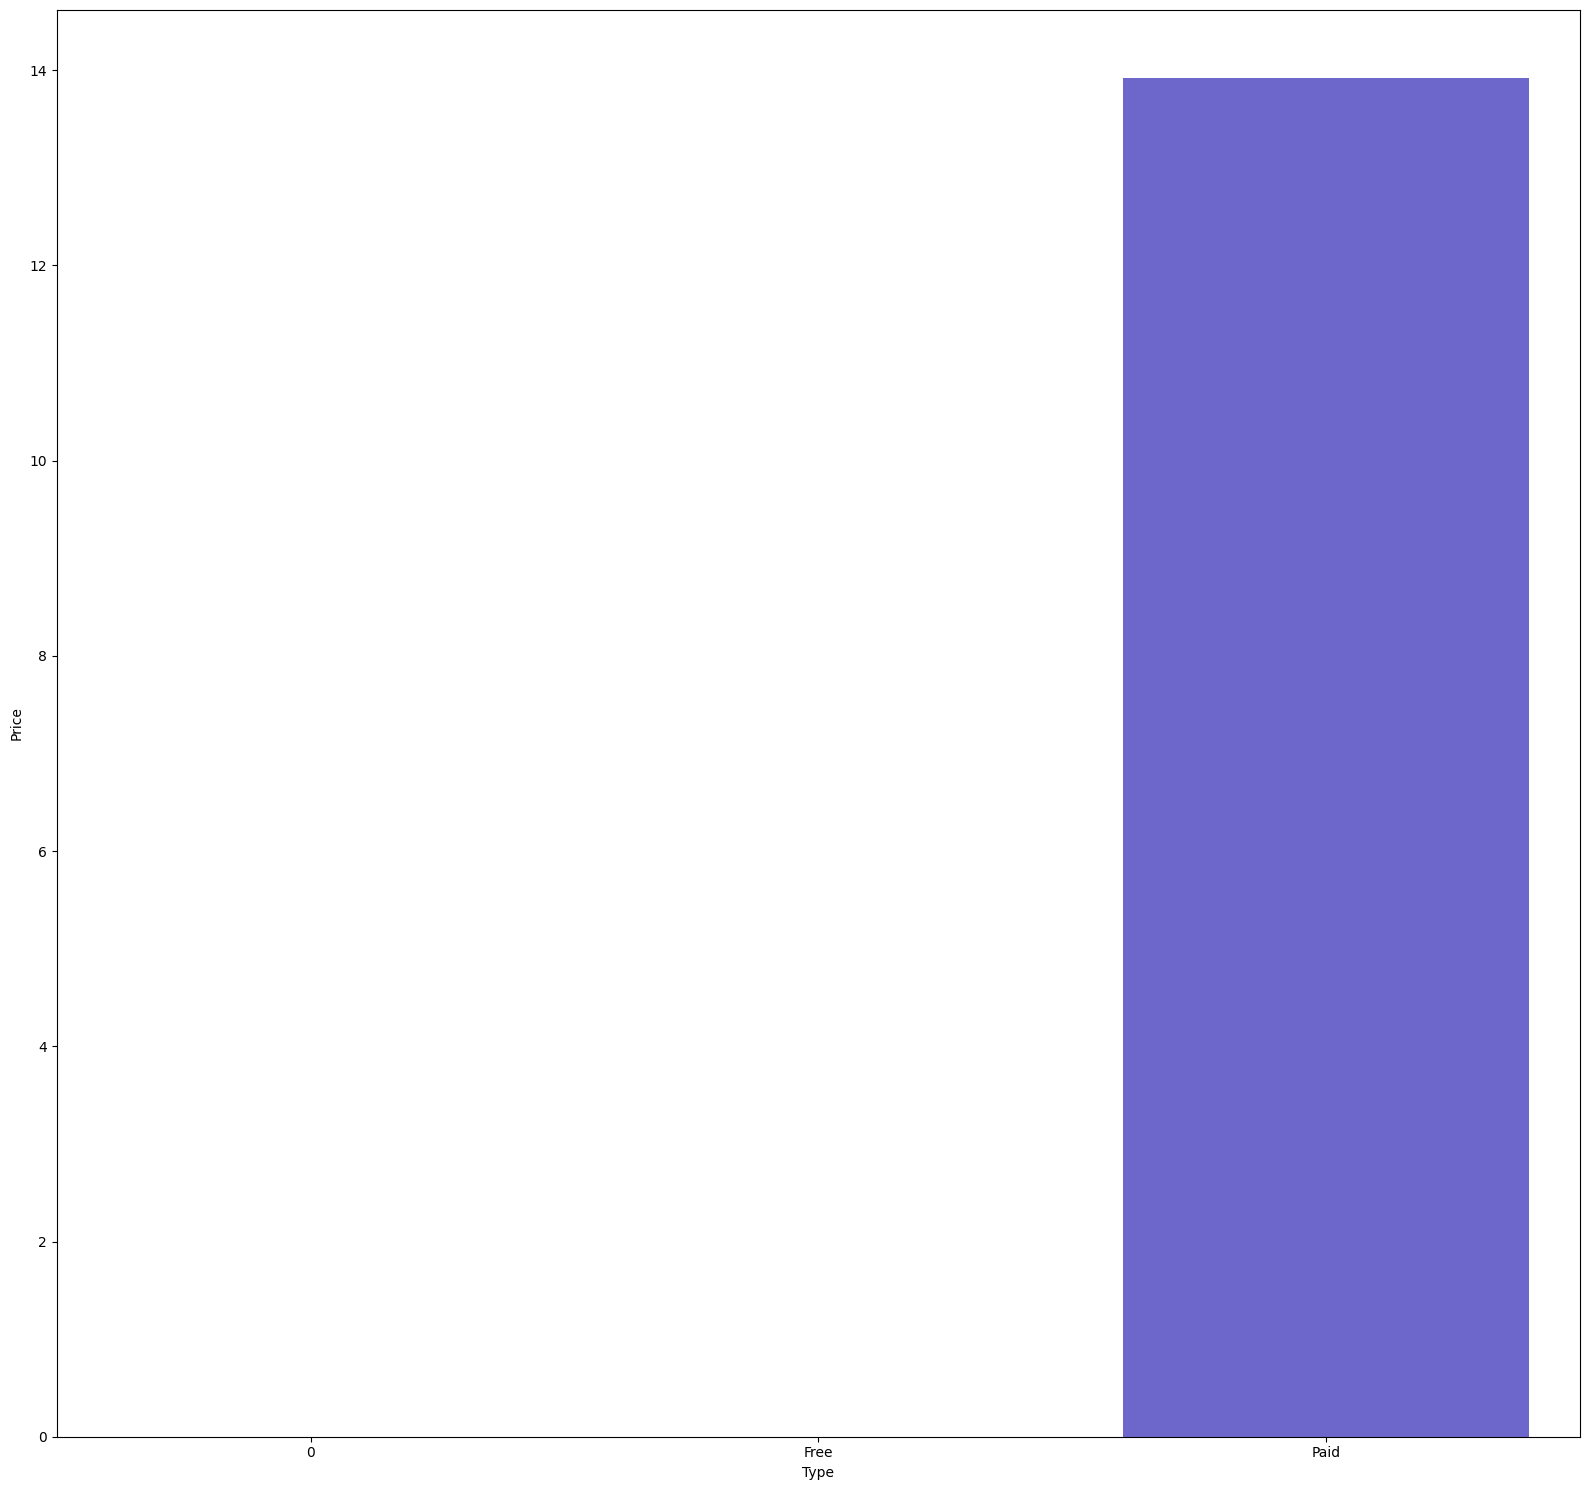

In [46]:
fig = plt.figure(figsize=(16,15))
sns.barplot(x=af.index[:3],y='Price',data=af[:3],palette='hls')
plt.tight_layout()

In [47]:
# ANS 14:
category = pd.DataFrame(df2['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

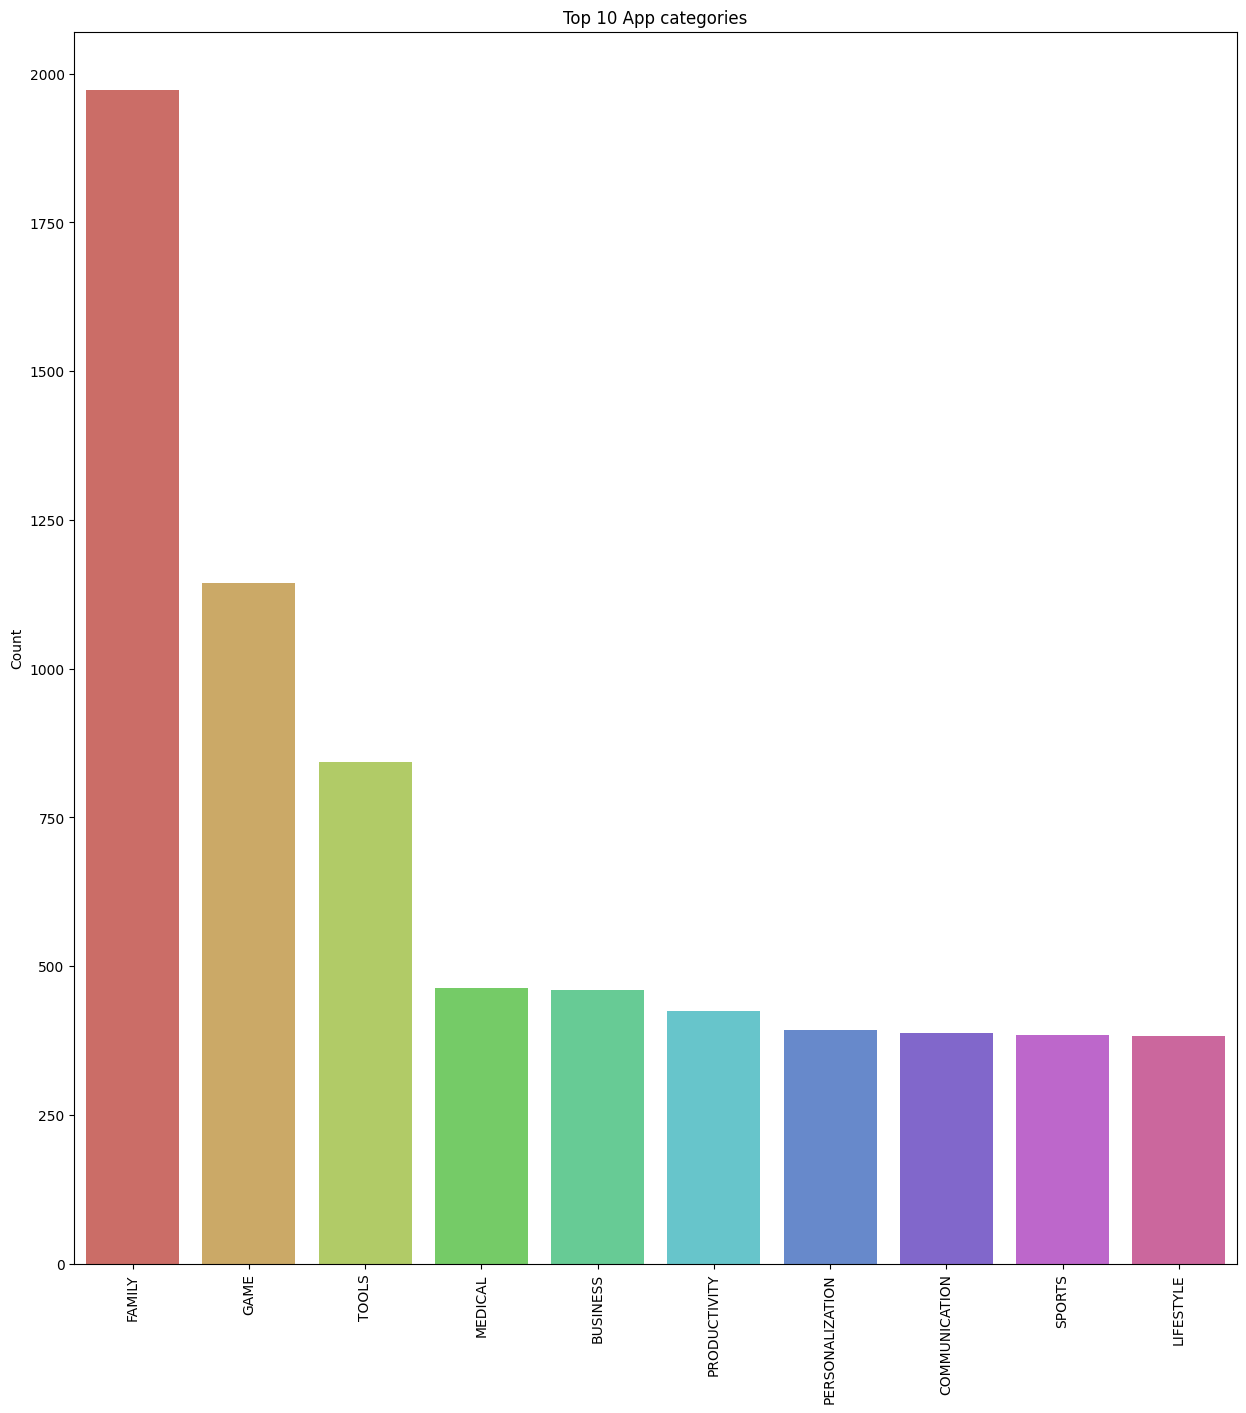

In [48]:
plt.figure(figsize=(15,16))
sns.barplot(x=category.index[:10],y='Count',data=category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Category'>

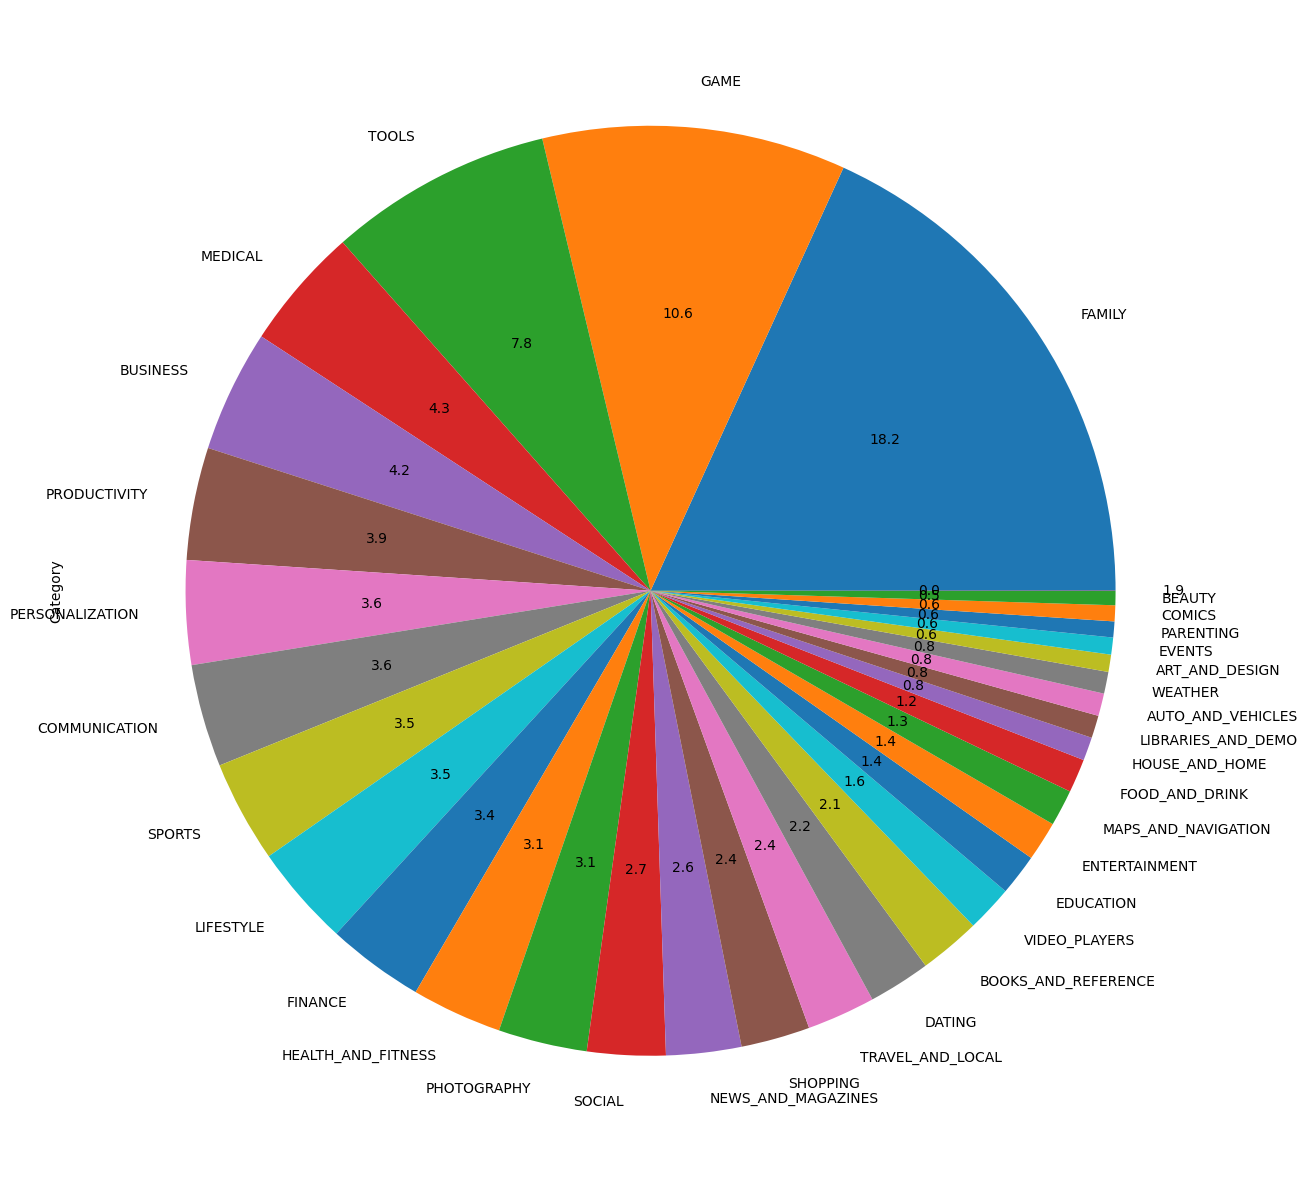

In [49]:
# ANS 15 :
## Which is most popular app category
# we can approach this taking out value counts of each category
# we analyze it by plotting a pie plot 
df2["Category"].value_counts().plot.pie(y=df2["Category"],figsize=(15,16),autopct='%1.1f')

In [50]:
# Family , Game , Tools is most popualar categories

In [51]:
# ANS 16:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
# we can approach this taking out the value counts of each android version
# analyzing by the barplot
sf = pd.DataFrame(df2["Android Ver"].value_counts())

In [53]:
sf

,Android Ver
4.1 and up,2451
4.0.3 and up,1501
4.0 and up,1375
Varies with device,1362
4.4 and up,980
2.3 and up,652
5.0 and up,601
4.2 and up,394
2.3.3 and up,281
2.2 and up,244


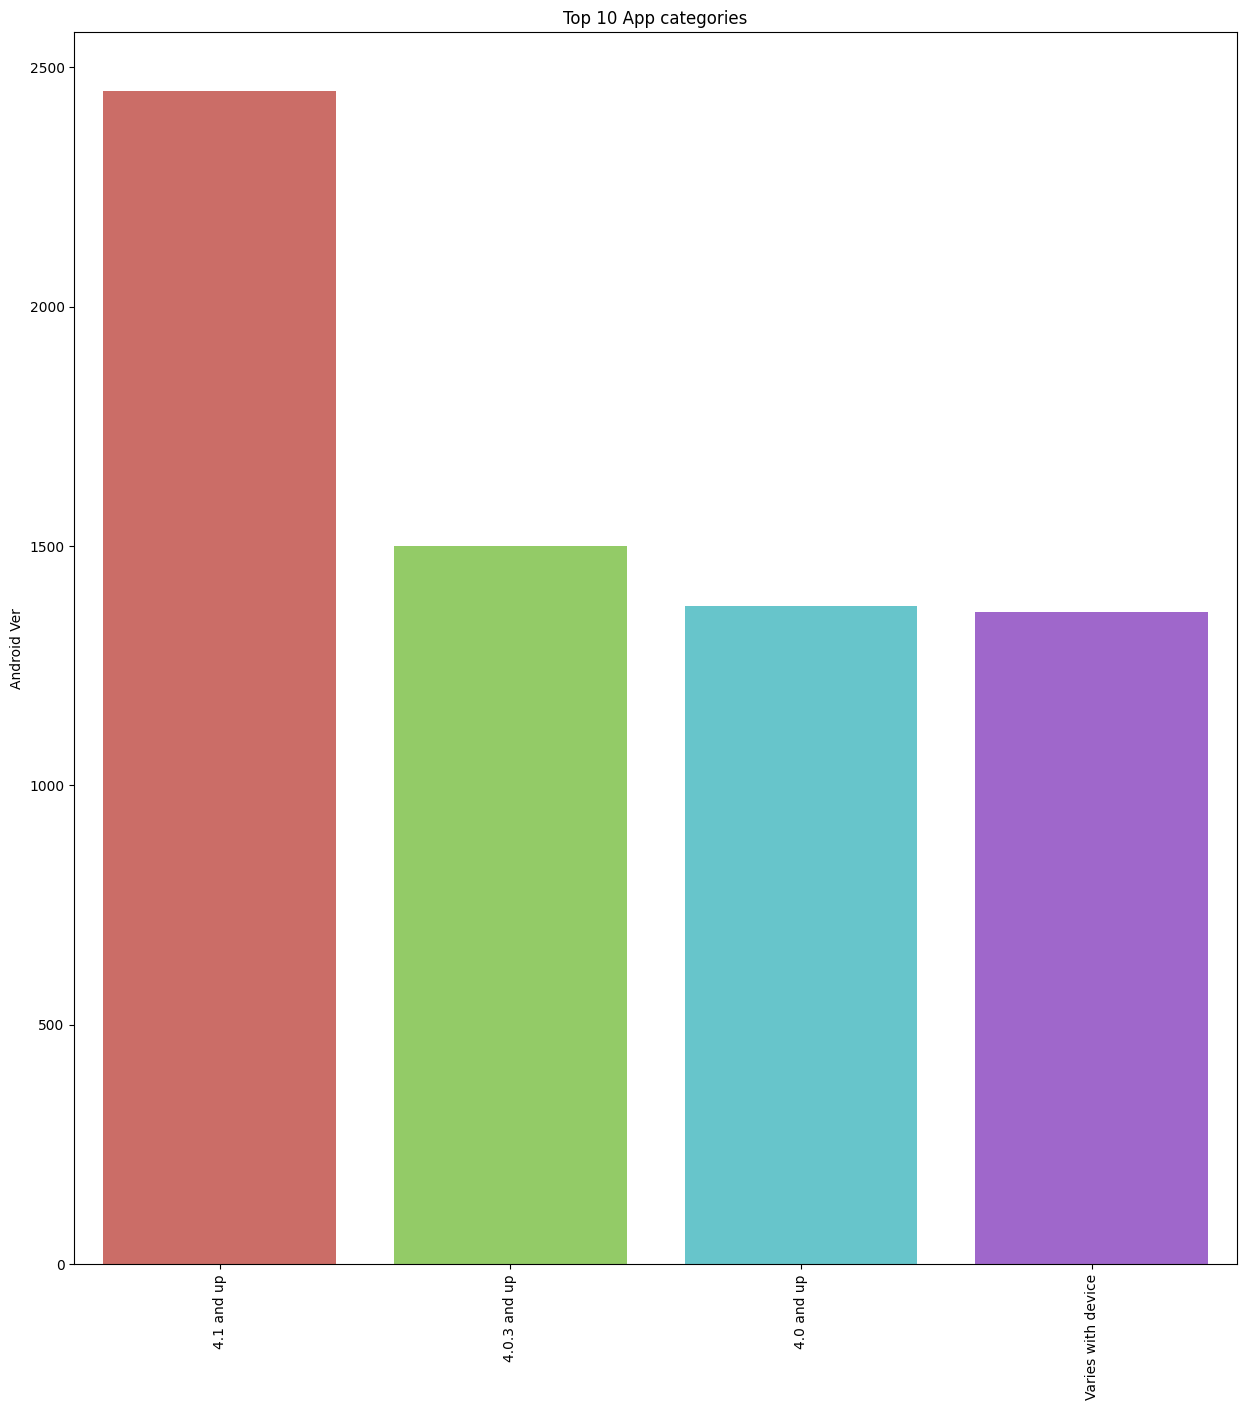

In [54]:
plt.figure(figsize=(15,16))
sns.barplot(x=sf.index[:4],y='Android Ver',data=sf[:4],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [55]:
# these are most famous app developers
# 4.1  
# 4.0.3  
# 4.0  

In [56]:
# ANS 17:
# we can approach this month from last updated feature and calculate value_counts
# whichever month gives the most count that month will be the best time to launch the new app
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [57]:
df2["month"] = df2["Last Updated"].str.split(' ').str[0]

In [58]:
df2["month"].value_counts()

July         3163
August       1594
June         1273
May           978
March         667
April         616
February      533
January       491
December      426
October       398
November      387
September     314
1.0.19          1
Name: month, dtype: int64

In [59]:
# BEST time should  in the month of july and august